## Histograms, Bins, and Probability Density Functions
<hr style="border:1px solid gray"> </hr>

In [1]:
# setup notebook:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

### Histograms

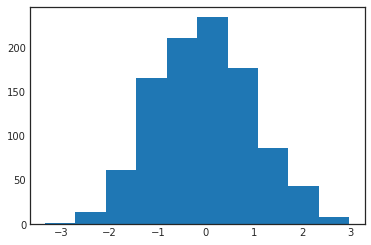

In [8]:
# Generate simple histogram
data = np.random.randn(1000)
plt.hist(data);

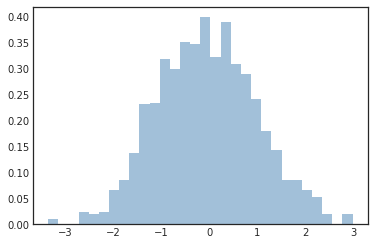

In [9]:
# Generate a histogram using more of plt.hist()'s kwargs
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

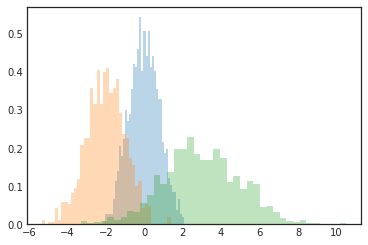

In [10]:
# plt.hist() can plot multiple histograms on a single graph.
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [11]:
# To compute histograms w/o plotting (i.e. count els in given bins), use np.histogram()
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 16 226 444 263  51]


Displaying and customizing 2D histogram plots:

As plt.hist() is to np.histogram(),

plt.hist2d() is to np.histogram2d()

In [12]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

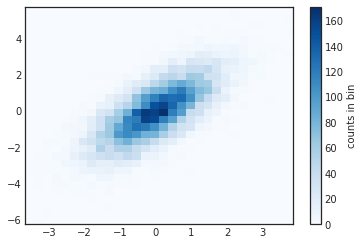

In [14]:
# Plot using hist2d()
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [16]:
# Count using np.histogram2d()
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

# For dimensionality > 2, use np.histogramdd().

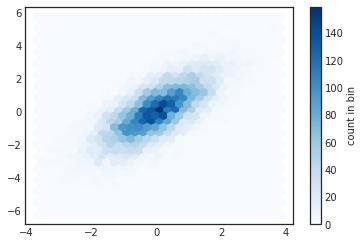

In [18]:
# Plot same data, this time using hexagonal binnings instead of the default squares.
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

### Discrete Probability Density Functions using Kernel Density Estimation (KDE)

In [20]:
# KDE will get a dedicated chapter later. See that for more details.

# For now, just use scipy's module for task.
from scipy.stats import gaussian_kde

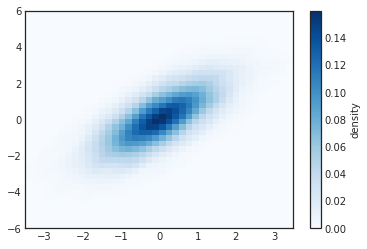

In [21]:
# Fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# Evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot results
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')

In [22]:
# Again, not getting the smoothing effect when using imshow(). Will have to revisit that.

In [23]:
# Other modules which implement KDE include:
# sklearn.neighbors.KernelDensity
# statsmodels.nonparametric.kernel_density.KDEMultivariate